## Test of trained MLPC on testset I & II 

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import pandas as pd
import pickle
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib.legend_handler import HandlerPatch

In [5]:
test_train_I = pd.read_csv("EDA_test_train.csv")
del test_train_I["Species"]
del test_train_I["Functional"]
testset_II = pd.read_csv("Holdout_testset.csv")
del testset_II["Species"]
df_all =test_train_I.append(testset_II)

# Normalization
MIN = test_train_I.min()
MAX = test_train_I.max()
df_all_norm = (df_all-MIN)/(MAX-MIN)

# Add a column with the Bonding category 
bond_class = [1,1,1,2,2,2,3,3,3,4,4]*28 +[1,1,1,1,1,1,1,1,1,1,1,2,2,2]
df_all_norm["Bonding Class"] = bond_class
species_number = [1,2,3,4,5,6,7,8,9,10,11]* 28+ [12,12,12,12,13,13,13,13,14,14,14,15,15,15]
structures=["ethane", "ethene", "ethyne", r"$NH_{3}-BH_{3}$", r"$NH_{3}-BCl_{3}$", r"$NH_{3}-BF_{3}$"
            , "CuCl-nNHC", "AgCl-nNHC", "AuCl-nNHC", r"$H_{2}O-H_{2}O$", r"$NH_{3}-NH_{3}$"]* 28 

# Load trained MLPC model
filename = 'final_MLPClassifier_4_classes_w_XC.sav'
MLPC = pickle.load(open(filename, 'rb'))

/tmp/ipykernel_839241/2262415862.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all =test_train_I.append(testset_II)


## Testset I (25% of original EDA Data)

Predicted Bonding class: [1 2 4 4 2 4 2 1 3 3 4 2 3 4 3 2 1 4 4 2 3 1 2 1 2 3 1 1 1 1 1 1 3 4 3 1 1
 3 1 1 4 1 2 3 3 3 1 4 1 2 2 2 3 2 1 1 1 1 3 1 2 3 3 1 3 2 3 2 1 3 3 3 3 3
 4 2 2]


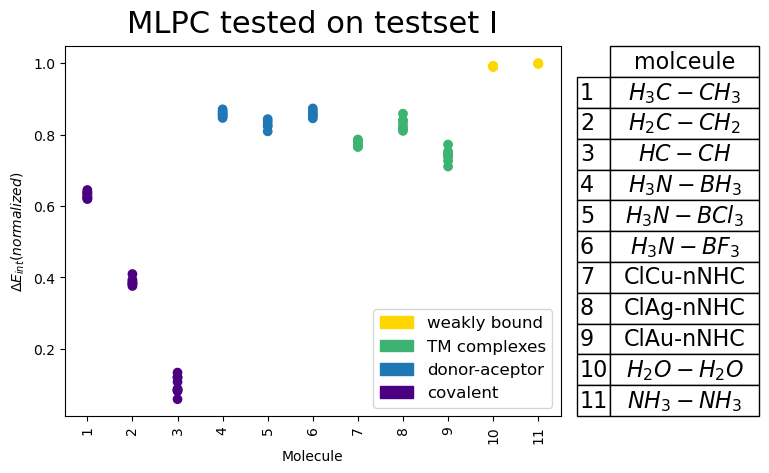

In [6]:
# Use 25% of the original data for testing (other 75% have been used for training)
new_df = df_all_norm.iloc[0:308]
X = new_df.loc[:,"Functional Number":"E_rel_Disp"]
Y = pd.DataFrame(bond_class).iloc[0:308]
x_train, x_test, y_train, y_test = train_test_split(X, Y,random_state=33)
indices = [i for i in x_test.index]
y_pred = MLPC.predict(x_test)
print ("Predicted Bonding class:",y_pred)
size=22
params = {'legend.fontsize': 'large',
          'figure.figsize': (5,5),
          'axes.labelsize': size,
          'axes.titlesize': size,
          'xtick.labelsize': size,
          'ytick.labelsize': size,
          'axes.titlepad': 10}
fig, ax = plt.subplots()
#cmap = plt.colormaps["viridis"].resampled(5)
plt.rcParams.update(params)


table = ax.table(
    cellText = [[r"$H_3C-CH_3$"], [r"$H_2C-CH_2$"], [r"$HC-CH$"], [r"$H_{3}N-BH_{3}$"], [r"$H_{3}N-BCl_{3}$"], [r"$H_{3}N-BF_{3}$"]
            , ["ClCu-nNHC"], ["ClAg-nNHC"], ["ClAu-nNHC"], [r"$H_{2}O-H_{2}O$"],[ r"$NH_{3}-NH_{3}$"]],
    rowLabels = [1,2,3,4,5,6,7,8,9,10,11],
    colLabels = ["molceule"],
    cellLoc ='center', 
    loc="right", 
    bbox = [1.1, 0.0, 0.3, 1.0],
    colWidths=[0.2 for x in ["molceule"]])     
table.set_fontsize(22)
table.scale(1.5, 1.5)


handles, labels = plt.gca().get_legend_handles_labels()
patch1 = mpatches.Patch(color='indigo', label='covalent')
patch2 = mpatches.Patch(color='tab:blue', label='donor-aceptor')
patch3 = mpatches.Patch(color='mediumseagreen', label='TM complexes')
patch4 = mpatches.Circle((10,10), radius=6.5, color='gold', label='weakly bound')

#add handles
handles.extend([patch4, patch3, patch2, patch1])

#add legend
plt.legend(handles=handles)

mol_numbs = [1,2,3,4,5,6,7,8,9,10,11]*28
mol_numbs = pd.DataFrame(mol_numbs)
colors = ['indigo','tab:blue','mediumseagreen','gold',]
n_bins = 4
cmap_name = 'my_list'
my_cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)
plt.scatter(mol_numbs.loc[indices], x_test["E_tot"], c=y_pred
           ,cmap=my_cmap)
#plt.colorbar()
plt.xticks(rotation=90)
plt.xlabel("Molecule")
plt.ylabel(r"$\Delta E_{int}(normalized)$")
plt.title("MLPC tested on testset I")
ticks =  [1,2,3,4,5,6,7,8,9,10,11]
plt.xticks(ticks)
plt.savefig("MLPC_testset_1.png",dpi=300)

## Test on hold-out testset

[1 1 1 1 1 1 1 1 1 1 1 2 2 2]


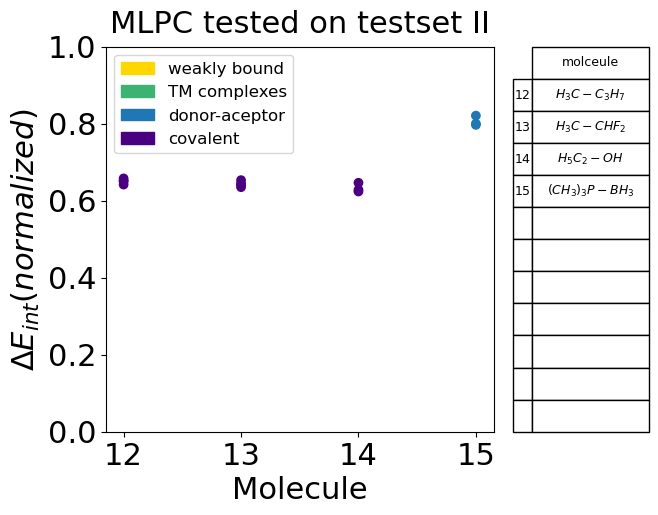

In [7]:
testset_II = df_all_norm.iloc[308:,:]
testset_II = testset_II.loc[:,"Functional Number":"E_rel_Disp"]
y_pred = MLPC.predict(testset_II)
print (y_pred)
new_mol_names = [r"$H_{3}C-C_{3}H_{7}$",r"$H_{3}C-C_{3}H_{7}$",r"$H_{3}C-C_{3}H_{7}$",r"$H_{3}C-C_{3}H_{7}$",r"$H_{3}C-CHF_{2}$",r"$H_{3}C-CHF_{2}$",r"$H_{3}C-CHF_{2}$",r"$H_{3}C-CHF_{2}$",r"$H_{5}C_{2}-OH$",r"$H_{5}C_{2}-OH$"
                 ,r"$H_{5}C_{2}-OH$",r"$(CH_{3})_{3}P-BH_{3}$",r"$(CH_{3})_{3}P-BH_{3}$",r"$(CH_{3})_{3}P-BH_{3}$"]


x_values = [12,12,12,12,13,13,13,13,14,14,14,15,15,15]
size=22
params = {'legend.fontsize': 'large',
          'figure.figsize': (5,5),
          'axes.labelsize': size,
          'axes.titlesize': size,
          'xtick.labelsize': size,
          'ytick.labelsize': size,
          'axes.titlepad': 10}
fig, ax = plt.subplots()

plt.rcParams.update(params)

table = ax.table(
    cellText = [[r"$H_{3}C-C_{3}H_{7}$"], [r"$H_{3}C-CHF_{2}$"], [r"$H_{5}C_{2}-OH$"], [r"$(CH_{3})_{3}P-BH_{3}$"],[""],[""],[""],[""],[""],[""],[""]],
    rowLabels = [12,13,14,15, "","","","","","",""],
    colLabels = ["molceule"],
    cellLoc ='center', 
    loc="right", 
    bbox = [1.1, 0.0, 0.3, 1.0],
    colWidths=[0.2 for x in ["molceule"]])     
table.set_fontsize(22)
table.scale(1.5, 1.5)

handles, labels = plt.gca().get_legend_handles_labels()
patch1 = mpatches.Patch(color='indigo', label='covalent')
patch2 = mpatches.Patch(color='tab:blue', label='donor-aceptor')
patch3 = mpatches.Patch(color='mediumseagreen', label='TM complexes')
patch4 = mpatches.Circle((10,10), radius=6.5, color='gold', label='weakly bound')
cmap_name = 'my_list'
colors = ['indigo','gold','mediumseagreen','tab:blue']
n_bins = 4
my_cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

#add handles
handles.extend([patch4, patch3, patch2, patch1])

#add legend
plt.legend(handles=handles)

plt.scatter(x_values, testset_II["E_tot"], c=y_pred,cmap=my_cmap)
#plt.colorbar()
plt.xticks(rotation=0)
plt.xlabel("Molecule")
plt.title("MLPC tested on testset II")
plt.ylim(0,1)
plt.ylabel(r"$\Delta E_{int}(normalized)$")
#plt.title("MLPC trained on the EDA results from all functionals, testset")
plt.savefig("MLPC_testset_2.png",dpi=300)